In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfTransformer, HashingVectorizer, CountVectorizer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,median_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.svm import SVR, SVC
from sklearn.linear_model import Lasso,LassoCV,LassoLarsCV, LinearRegression, Ridge, ElasticNet
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
font2 = {'size': 20,'weight': 'normal'} # This code is so as to adjust the size of character among the axis


data = pd.read_csv("toxiccomments_train.csv")
data = data.dropna()

ID = data["id"]
identity_hate = data["identity_hate"]
comment_text = data['comment_text']
has = HashingVectorizer().fit(comment_text)
features = has.fit_transform(comment_text)



label = identity_hate

# for i in range(len(data)):
#     features.iloc[i] = str(features[i])
#     if label.iloc[i] == "TRUE":
#         label.iloc[i] = 1
#     else:
#         label.iloc[i] = 0



X_train, X_test, y_train, y_test = train_test_split(features[0:500], label[0:500], test_size=0.5, random_state=0)


Lasso regression model mean absolute error： 0.023744000000000005
Lasso regression model mean squared error ： 0.008000000000000002
Lasso regression model median absolute error： 0.016
Lasso regression model explained variance score： 0.0
Lasso regression model r2 score： -0.008064516129032917


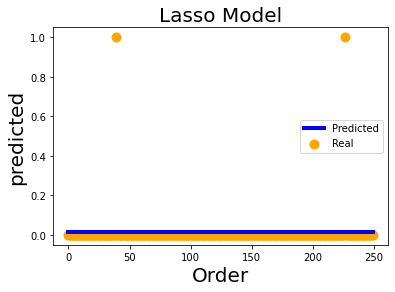

Linear regression model mean absolute error： 0.046559340106311596
Linear regression model mean squared error： 0.00806712445534741
Linear regression model median absolute error： 0.03204373053295611
Linear regression model explained variance score： 0.19212982665038836
Linear regression model r2 score： 0.18513894390430197


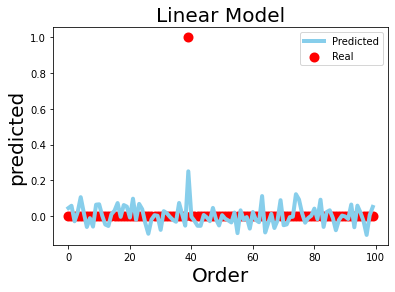

ridge regression model mean absolute error： 0.02792540888822014
ridge regression model mean squared error： 0.00953257915393784
ridge regression model median absolute error： 0.014678394615021725
ridge regression model explained variance score： 0.03713752073201526
ridge regression model r2 score： 0.037113216773955404


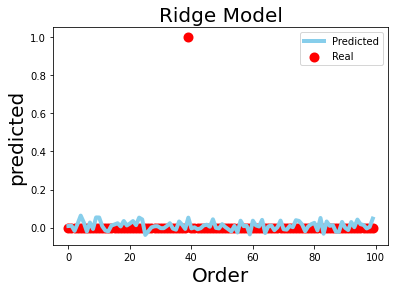

In [2]:
lasso = Lasso(alpha=2, normalize=True)       #Revoke the model Lasso
results_lasso = lasso.fit(X_train, y_train)     #Fit the train dataset
y_predict = lasso.predict(X_test)               #Predict the result by utilizing the Lasso model

print('Lasso regression model mean absolute error：',mean_absolute_error(y_test,y_predict))
print('Lasso regression model mean squared error ：',mean_squared_error(y_test,y_predict))
print('Lasso regression model median absolute error：',median_absolute_error(y_test,y_predict))
print('Lasso regression model explained variance score：',explained_variance_score(y_test,y_predict))
print('Lasso regression model r2 score：',r2_score(y_test,y_predict))
plt.figure()        #Create a new figure
plt.scatter( range(len(y_test)), y_test, color = "orange", label = "Real", linewidth = 4)   #Plot the real data
plt.plot(range(len(y_test)), y_predict, color = "blue", label = "Predicted", linewidth = 4) #Plot the predicted data
plt.title("Lasso Model", fontdict=font2)    #Set the model title name
plt.xlabel("Order", fontdict= font2)
plt.ylabel("predicted", fontdict= font2)
plt.legend()
plt.show()


X_train, X_test, y_train, y_test = train_test_split(features[0:500], label[0:500], test_size=0.2, random_state=0)

LinearRegression_model = LinearRegression()         #Use the model LinearRegression
LinearRegression_model.fit(X_train, y_train)        #Fit the train dataset
y_predict = LinearRegression_model.predict(X_test)  #Predict the result by utilizing the LinearRegression model
print('Linear regression model mean absolute error：',mean_absolute_error(y_test,y_predict))
print('Linear regression model mean squared error：',mean_squared_error(y_test,y_predict))
print('Linear regression model median absolute error：',median_absolute_error(y_test,y_predict))
print('Linear regression model explained variance score：',explained_variance_score(y_test,y_predict))
print('Linear regression model r2 score：',r2_score(y_test,y_predict))
plt.figure()
plt.scatter( range(len(y_test)), y_test, color = "red", label = "Real", linewidth = 4)          #Plot the real data
plt.plot(range(len(y_test)), y_predict, color = "skyblue", label = "Predicted", linewidth = 4)  #Plot the predicted data
plt.title("Linear Model", fontdict=font2)
plt.xlabel("Order", fontdict= font2)
plt.ylabel("predicted", fontdict= font2)
plt.legend()
plt.show()



ridge = Ridge(alpha=2.0, fit_intercept=True, normalize=False,copy_X=True, max_iter=None, tol=1e-3, solver="auto",
                         random_state=None)
ridge.fit(X_train, y_train)             #Fit the train dataset
y_predict = ridge.predict(X_test)       #Predict the result by utilizing the Ridge model
print('ridge regression model mean absolute error：',mean_absolute_error(y_test,y_predict))
print('ridge regression model mean squared error：',mean_squared_error(y_test,y_predict))
print('ridge regression model median absolute error：',median_absolute_error(y_test,y_predict))
print('ridge regression model explained variance score：',explained_variance_score(y_test,y_predict))
print('ridge regression model r2 score：',r2_score(y_test,y_predict))
plt.figure()
plt.scatter( range(len(y_test)), y_test, color = "red", label = "Real", linewidth = 4)          #Plot the real data
plt.plot(range(len(y_test)), y_predict, color = "skyblue", label = "Predicted", linewidth = 4)  #Plot the predicted data
plt.title("Ridge Model", fontdict=font2)
plt.xlabel("Order", fontdict= font2)
plt.ylabel("predicted", fontdict= font2)
plt.legend()
plt.show()

In [3]:
ID_data = data['id']
fea_csv = HashingVectorizer().fit(data['comment_text'])
fea_csv = fea_csv.fit_transform(data['comment_text'])
ID_csv = pd.DataFrame({"id":ID_data, "prediction":ridge.predict(fea_csv)})
for i in range(len(ID_csv)):
    if ID_csv["prediction"][i]>0.5:
        ID_csv["prediction"][i] = True
    else:
        ID_csv["prediction"][i]  = False
print("ID_csv = ", ID_csv)
ID_csv.to_csv("toxiccomments_submission3.csv")

<ipython-input-3-440b02afd398>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ID_csv["prediction"][i]  = False
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


ID_csv =                        id prediction
0       0000997932d777bf      False
1       000103f0d9cfb60f      False
2       000113f07ec002fd      False
3       0001b41b1c6bb37e      False
4       0001d958c54c6e35      False
...                  ...        ...
159566  ffe987279560d7ff      False
159567  ffea4adeee384e90      False
159568  ffee36eab5c267c9      False
159569  fff125370e4aaaf3      False
159570  fff46fc426af1f9a      False

[159571 rows x 2 columns]
